In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import math

In [2]:
class chibi:
    def __init__(self) -> None:
        self.cascade_face = cv2.CascadeClassifier('./cascade/haarcascade_frontalface_default.xml')
        self.cascade_eye = cv2.CascadeClassifier('./cascade/haarcascade_eye.xml')
        
    def _resize(self, img, length=500):
        """resize image to 500 px"""
        h, w, _ = img.shape
        if h > w:
            ratio = length / h
            new_shape = (int(ratio * w), length)
        else:
            ratio = length / w
            new_shape = (length, int(ratio * h))
        return cv2.resize(img, new_shape)

    def _render_spiral(self, img, center, radius, color):
        """c.f. https://tat-pytone.hatenablog.com/entry/2020/07/13/093228"""
        for i in range(2000):
            theta = i/130
            r = 0.1 * radius * theta
            x = int(r * math.cos(theta) + center[0])
            y = int(-r * math.sin(theta) + center[1])
            cv2.circle(img, (x, y), 1, color, -1)
        
    def _metallica(self,
                   src_path,   # source to image
                   FACE=False, # whether to render face rectangle or not
                   EYE=False,  # whether to render eye rectangle or not
                   skip_idx=[]  # to skip false recognition
                   ):
        src = cv2.imread(src_path)
        src = self._resize(src)
        src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

        faces = self.cascade_face.detectMultiScale(src_gray)

        if len(faces) != 1:
            print(f'{len(faces)} face(s) detected.')
        for i, (x, y, w, h) in enumerate(faces):
            if i in skip_idx:
                continue
            if FACE:
                cv2.rectangle(src, (x, y), (x + w, y + h), (255, 0, 0), 2)

            o_x1, o_y1 = int(x + 0.2*w), int(y + 0.6*h) + random.randint(-3, 3)
            o_x2, o_y2 = int(x + 0.8*w), int(y + 0.6*h) + random.randint(-3, 3)
            o_r = int(0.1 * max(w, h))
            o_color = (0, random.randint(0, 100), 205+random.randint(0, 50))
            self._render_spiral(src, (o_x1, o_y1), o_r, o_color)
            self._render_spiral(src, (o_x2, o_y2), o_r, o_color)
            if EYE:
                face_gray = src_gray[y: y + h, x: x + w]
                eyes = self.cascade_eye.detectMultiScale(face_gray)
                for (ex, ey, ew, eh) in eyes:
                    face = src[y: y + h, x: x + w]
                    cv2.rectangle(face, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        return src

    def imshow(self, src_path, FACE=False, EYE=False, skip_idx=[]):
        src = self._metallica(src_path, FACE, EYE, skip_idx=skip_idx)
        img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    def imwrite(self, src_path, skip_idx=[]):
        src = self._metallica(src_path, FACE=False, EYE=False, skip_idx=skip_idx)
        cv2.imwrite('out.jpg', src)

In [ ]:
class chibi:
    def __init__(self) -> None:
        self.cascade_face = cv2.CascadeClassifier('./cascade/haarcascade_frontalface_default.xml')
        self.cascade_eye = cv2.CascadeClassifier('./cascade/haarcascade_eye.xml')
        
    def _resize(self, img, length=500):
        """resize image to 500 px"""
        h, w, _ = img.shape
        if h > w:
            ratio = length / h
            new_shape = (int(ratio * w), length)
        else:
            ratio = length / w
            new_shape = (length, int(ratio * h))
        return cv2.resize(img, new_shape)

    def _render_spiral(self, img, center, radius, color):
        """c.f. https://tat-pytone.hatenablog.com/entry/2020/07/13/093228"""
        for i in range(2000):
            theta = i/130
            r = 0.1 * radius * theta
            x = int(r * math.cos(theta) + center[0])
            y = int(-r * math.sin(theta) + center[1])
            cv2.circle(img, (x, y), 1, color, -1)
        
    def _metallica(self,
                   src_path,   # source to image
                   FACE=False, # whether to render face rectangle or not
                   EYE=False,  # whether to render eye rectangle or not
                   skip_idx=[] # to skip false recognition
                   ):
        src = cv2.imread(src_path)
        src = self._resize(src)
        src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

        faces = self.cascade_face.detectMultiScale(src_gray)

        if len(faces) != 1:
            print(f'{len(faces)} face(s) detected.')
        for i, (x, y, w, h) in enumerate(faces):
            if i in skip_idx:
                continue
            if FACE:
                cv2.rectangle(src, (x, y), (x + w, y + h), (255, 0, 0), 2)

            o_x1, o_y1 = int(x + 0.2*w), int(y + 0.6*h) + random.randint(-3, 3)
            o_x2, o_y2 = int(x + 0.8*w), int(y + 0.6*h) + random.randint(-3, 3)
            o_r = int(0.1 * max(w, h))
            o_color = (0, random.randint(0, 100), 205+random.randint(0, 50))
            self._render_spiral(src, (o_x1, o_y1), o_r, o_color)
            self._render_spiral(src, (o_x2, o_y2), o_r, o_color)
            if EYE:
                face_gray = src_gray[y: y + h, x: x + w]
                eyes = self.cascade_eye.detectMultiScale(face_gray)
                for (ex, ey, ew, eh) in eyes:
                    face = src[y: y + h, x: x + w]
                    cv2.rectangle(face, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        return src

    def imshow(self, src_path, FACE=False, EYE=False, skip_idx=[]):
        src = self._metallica(src_path, FACE, EYE, skip_idx=skip_idx)
        img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    def imwrite(self, src_path, skip_idx=[]):
        src = self._metallica(src_path, FACE=False, EYE=False, skip_idx=skip_idx)
        cv2.imwrite('out.jpg', src)

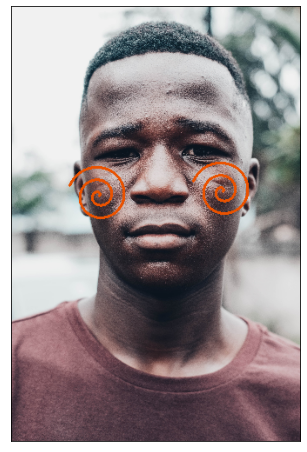

2 face(s) detected.


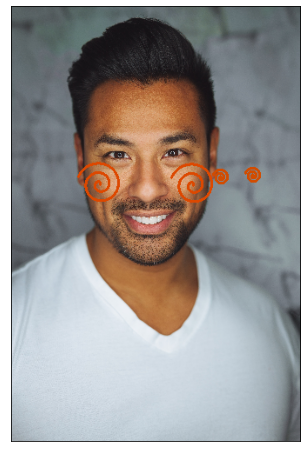

2 face(s) detected.


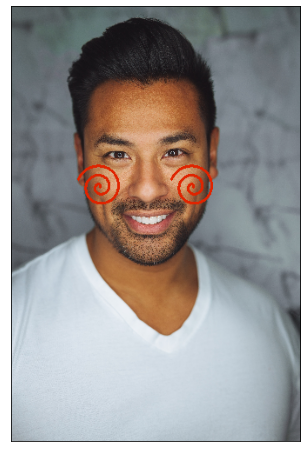

In [3]:
c = chibi()
c.imshow('portrait/man1.jpg')
c.imshow('portrait/man2.jpg')
c.imshow('portrait/man2.jpg', skip_idx=[0])

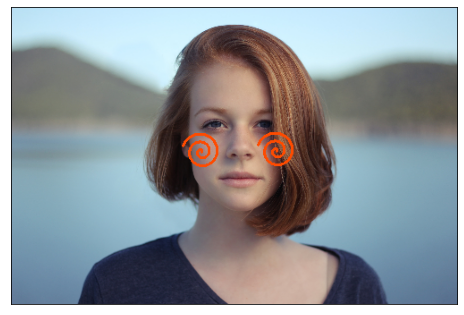

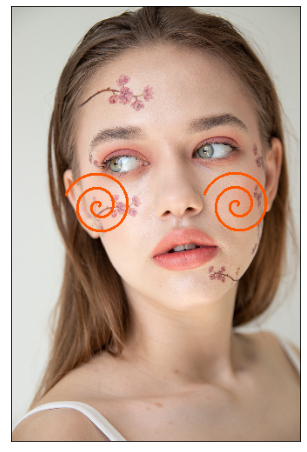

In [114]:
c.imshow('portrait/woman1.jpg')
c.imshow('portrait/woman2.jpg')

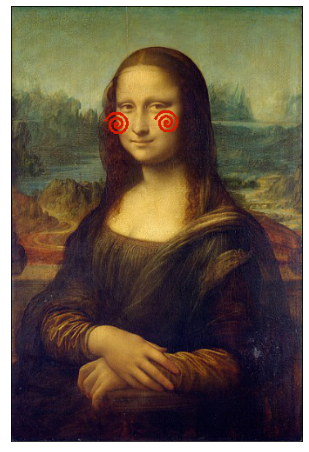

0 face(s) detected.


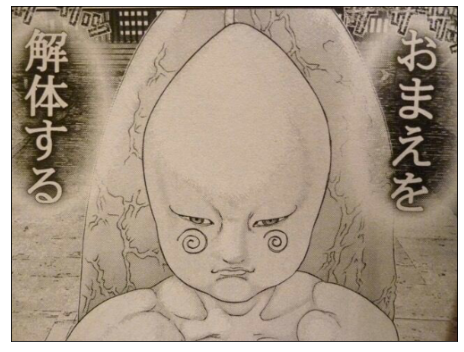

In [4]:
c.imshow('portrait/mona.jpg')
c.imshow('portrait/chibi.jpg')